In [67]:
pip install xgboost


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [94]:
pip install ahpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.4 MB/s eta 0:00:00ta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import ahpy
from matplotlib import rc

rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False

---

## 야구 인기 칼럼 분석

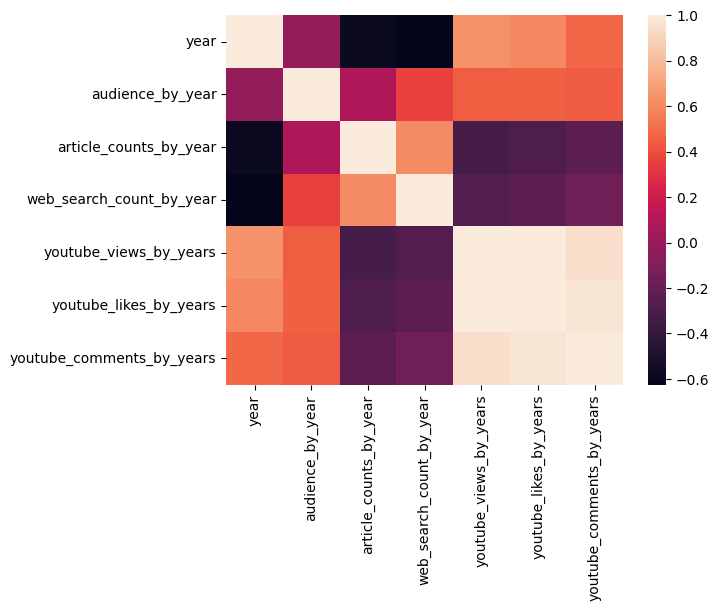

In [69]:
data = pd.read_csv('./baseball_popularity_by_years.csv')
sns.heatmap(data.corr())
plt.show()
# audience_by_year이 타겟으로 봤을 때, 유튜브 데이터가 제일 관련이 있다.

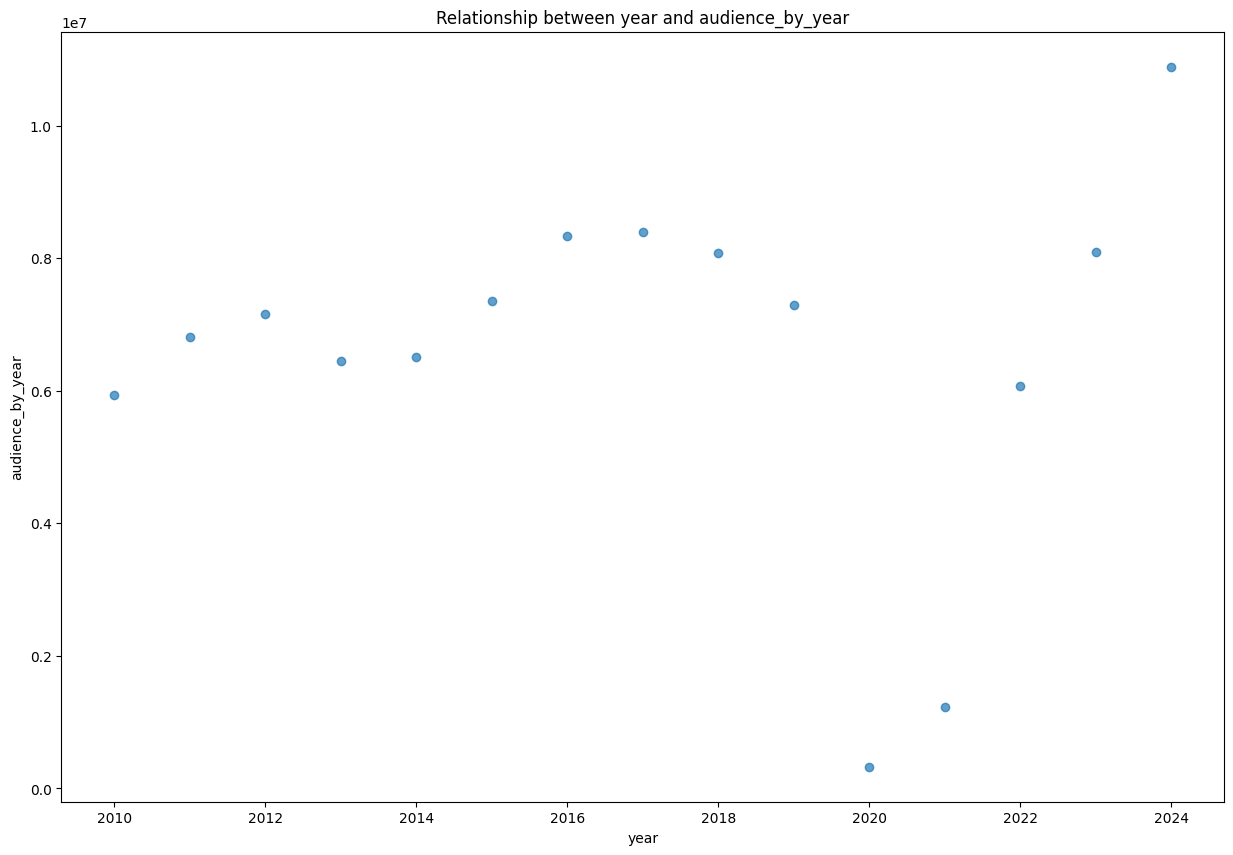

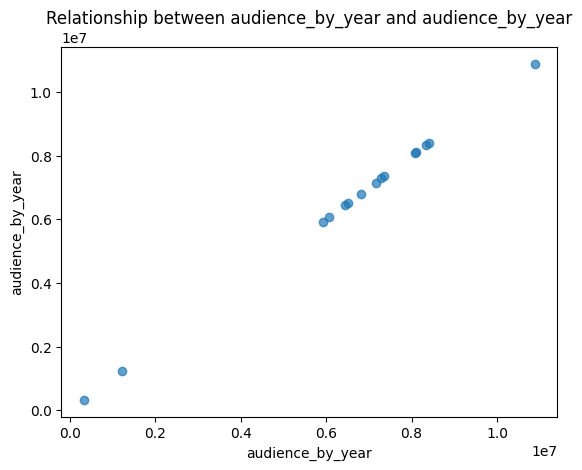

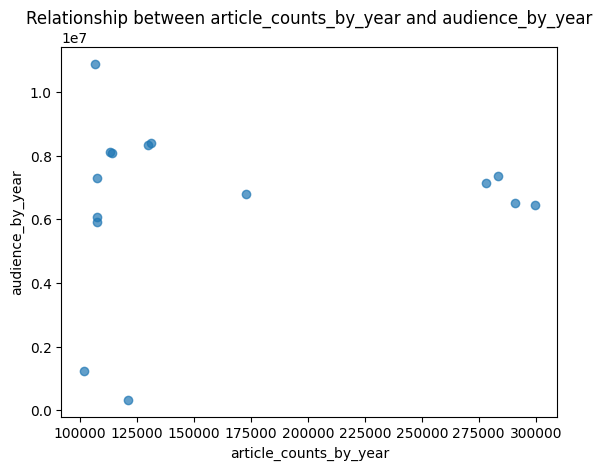

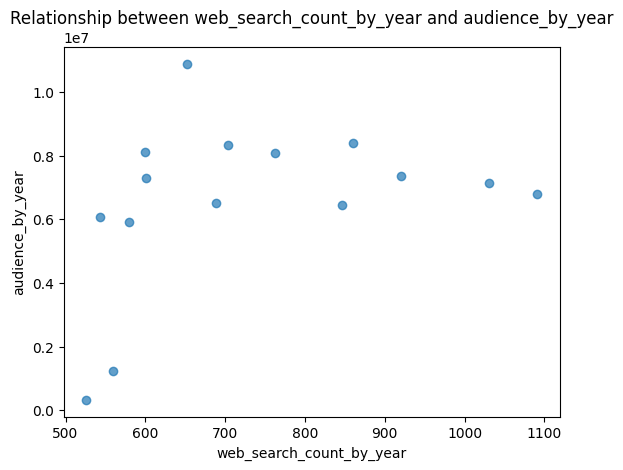

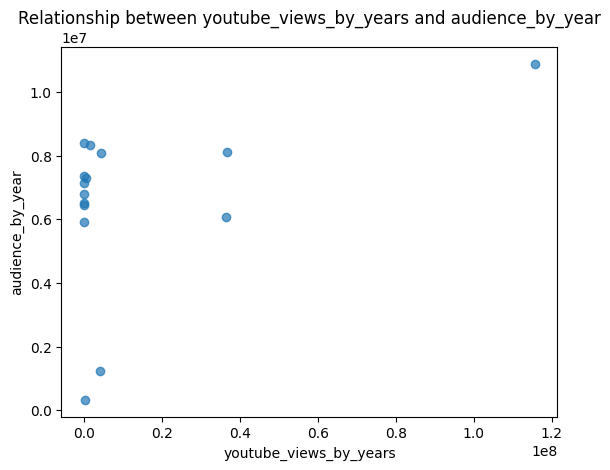

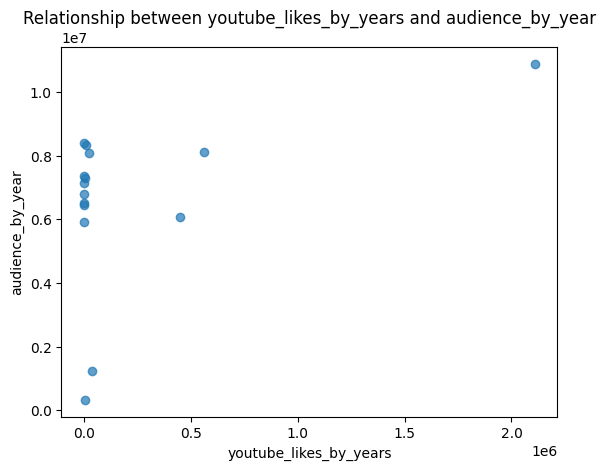

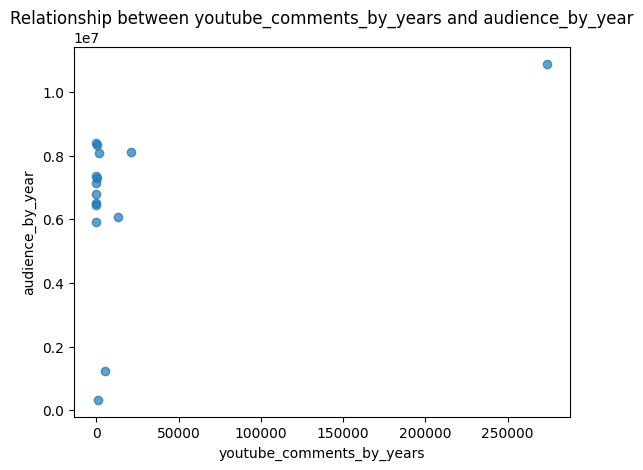

In [70]:
# Target 값과 다른 칼럼들의 관계성을 보기 위한 플롯 생성

features = data.keys().to_list()
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    # plt.subplot(2, 3, i + 1)
    plt.scatter(data[feature], data['audience_by_year'], alpha=0.7)
    plt.title(f'Relationship between {feature} and audience_by_year')
    plt.xlabel(feature)
    plt.ylabel('audience_by_year')
    plt.show()

# plt.tight_layout()
# plt.show()

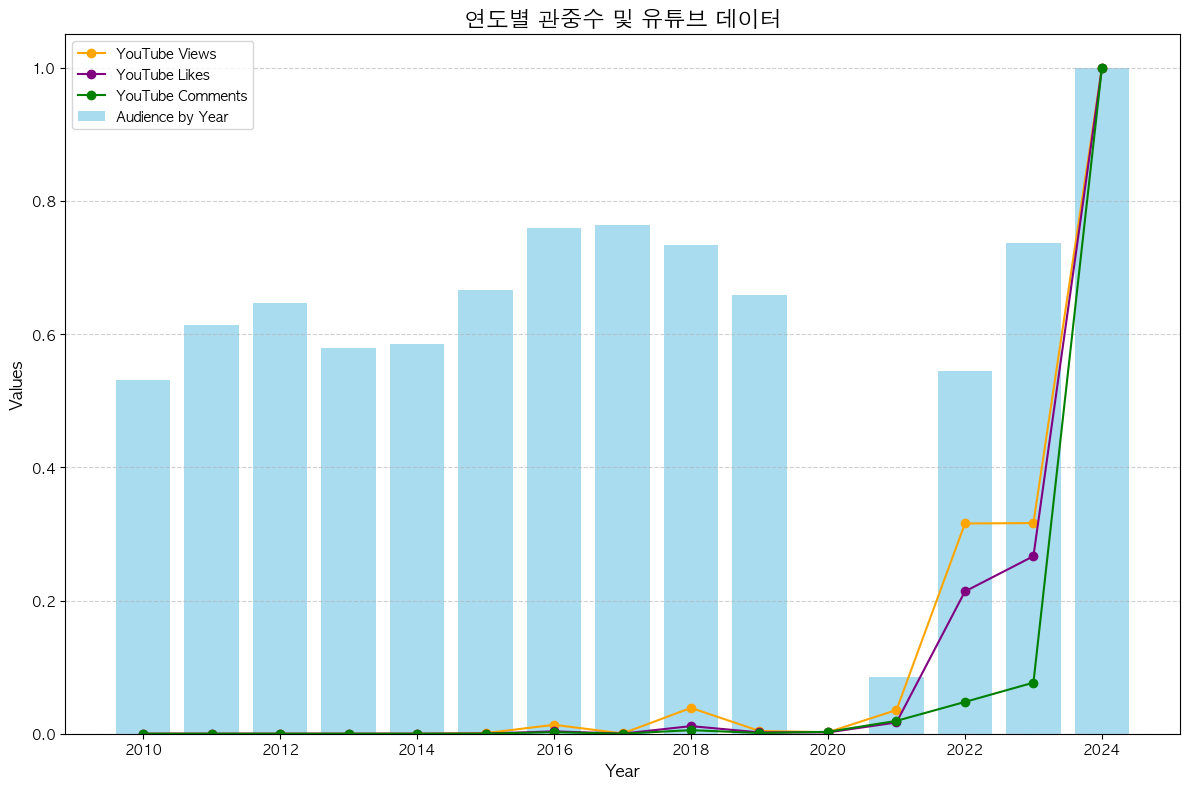

In [8]:
data = pd.read_csv('./baseball_popularity_by_years.csv')

# 스케일링 수행
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 1:])  # year 제외
scaled_df = pd.DataFrame(scaled_data, columns=data.columns[1:])  # 스케일링 결과 DataFrame
scaled_df['year'] = data['year']  # 원래 연도 정보 추가

# 연도별 관중수와 다른 칼럼을 동시에 시각화
plt.figure(figsize=(12, 8))

# 관중수를 막대그래프로 시각화
plt.bar(scaled_df['year'], scaled_df['audience_by_year'], color='skyblue', alpha=0.7, label='Audience by Year')

# 다른 칼럼들의 선그래프 추가
# plt.plot(scaled_df['year'], scaled_df['article_counts_by_year'], color='orange', marker='o', label='Article Counts')
# plt.plot(scaled_df['year'], scaled_df['web_search_count_by_year'], color='green', marker='o', label='Web Search Count')
plt.plot(scaled_df['year'], scaled_df['youtube_views_by_years'], color='orange', marker='o', label='YouTube Views')
plt.plot(scaled_df['year'], scaled_df['youtube_likes_by_years'], color='purple', marker='o', label='YouTube Likes')
plt.plot(scaled_df['year'], scaled_df['youtube_comments_by_years'], color='green', marker='o', label='YouTube Comments')

# 그래프 꾸미기
plt.title('연도별 관중수 및 유튜브 데이터', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# 그래프 출력
plt.show()

                     Feature  Importance    Weight
1   web_search_count_by_year    0.810561  0.810561
0     article_counts_by_year    0.121703  0.121703
2     youtube_views_by_years    0.067736  0.067736
3     youtube_likes_by_years    0.000000  0.000000
4  youtube_comments_by_years    0.000000  0.000000


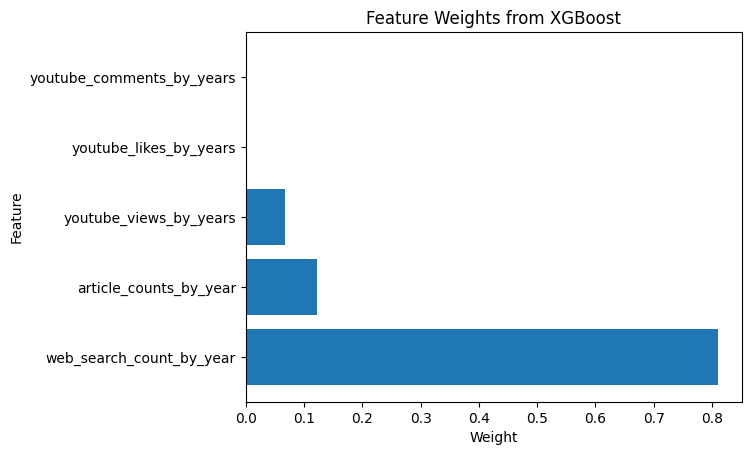

In [72]:
# 데이터 로드
file_path = 'baseball_popularity_by_years.csv'
data = pd.read_csv(file_path)

# 타겟 변수와 독립 변수 설정
X = data.drop(columns=['audience_by_year', 'year'])  # 독립 변수 (연도 제외)
y = data['audience_by_year']                        # 타겟 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 피처 중요도 계산
feature_importances = model.feature_importances_
feature_weights = feature_importances / np.sum(feature_importances)  # 가중치로 변환

# 결과를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances,
    'Weight': feature_weights
}).sort_values(by='Importance', ascending=False)

# 결과 출력
print(importance_df)

# 피처 가중치 시각화
import matplotlib.pyplot as plt

plt.barh(importance_df['Feature'], importance_df['Weight'])
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Weights from XGBoost')
plt.show()

                     Feature  Importance    Weight
1   web_search_count_by_year    0.892503  0.892503
2     youtube_views_by_years    0.093572  0.093572
0     article_counts_by_year    0.013924  0.013924
3     youtube_likes_by_years    0.000000  0.000000
4  youtube_comments_by_years    0.000000  0.000000


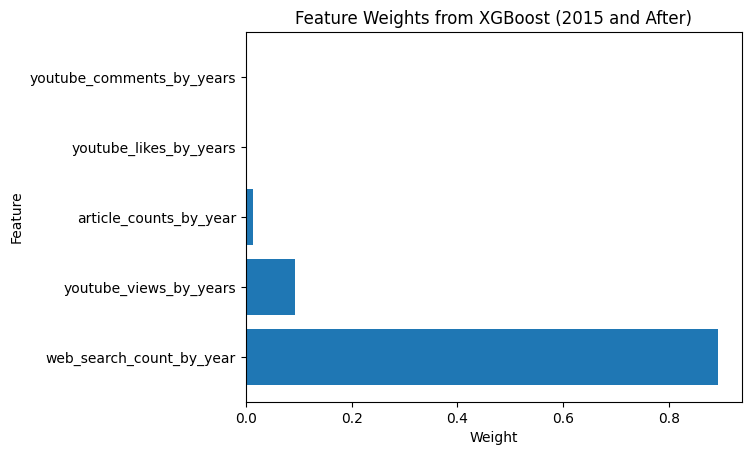

In [98]:
file_path = 'baseball_popularity_by_years.csv'
data = pd.read_csv(file_path)

# 2015년 이후 데이터 필터링
filtered_data = data[data['year'] >= 2015]

# 타겟 변수와 독립 변수 설정
X = filtered_data.drop(columns=['audience_by_year', 'year'])  # 독립 변수
y = filtered_data['audience_by_year']                        # 타겟 변수

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 피처 중요도 계산
feature_importances = model.feature_importances_
feature_weights = feature_importances / np.sum(feature_importances)  # 가중치로 변환

# 결과를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances,
    'Weight': feature_weights
}).sort_values(by='Importance', ascending=False)

# 중요도 데이터프레임 출력
print(importance_df)
importance_df.to_csv('index_analysis_by_year.csv', index=False)
# 피처 중요도 시각화
plt.barh(importance_df['Feature'], importance_df['Weight'])
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Weights from XGBoost (2015 and After)')
plt.show()

[6.7546345e-02 9.3203908e-01 4.1456489e-04 0.0000000e+00 0.0000000e+00]
                     Feature  Importance    Weight
1   web_search_count_by_year    0.932039  0.932039
0     article_counts_by_year    0.067546  0.067546
2     youtube_views_by_years    0.000415  0.000415
3     youtube_likes_by_years    0.000000  0.000000
4  youtube_comments_by_years    0.000000  0.000000


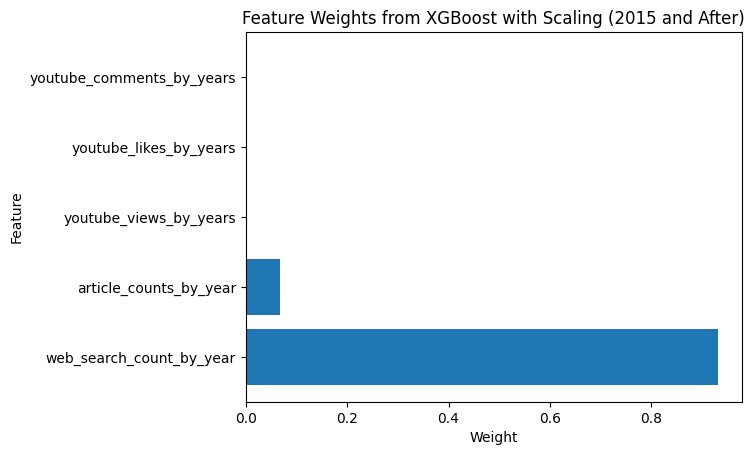

In [79]:
file_path = 'baseball_popularity_by_years.csv'
data = pd.read_csv(file_path)

# 2015년 이후 데이터 필터링
filtered_data = data[data['year'] >= 2015]

# 타겟 변수와 독립 변수 설정
X = filtered_data.drop(columns=['audience_by_year', 'year'])  # 독립 변수
y = filtered_data['audience_by_year']                        # 타겟 변수

# 스케일링 적용 (StandardScaler 사용)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# XGBoost 모델 학습
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 피처 중요도 계산
feature_importances = model.feature_importances_
feature_weights = feature_importances / np.sum(feature_importances)  # 가중치로 변환

# 결과를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances,
    'Weight': feature_weights
}).sort_values(by='Importance', ascending=False)

# 중요도 데이터프레임 출력
print(importance_df)


# 피처 중요도 시각화
plt.barh(importance_df['Feature'], importance_df['Weight'])
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Weights from XGBoost with Scaling (2015 and After)')
plt.show()

In [66]:
corr_matrix = data.corr()
print(corr_matrix['audience_by_year'].sort_values(ascending=False))


audience_by_year             1.000000
youtube_likes_by_years       0.460132
youtube_views_by_years       0.448899
youtube_comments_by_years    0.447071
web_search_count_by_year     0.353438
article_counts_by_year       0.081272
year                        -0.016533
Name: audience_by_year, dtype: float64


## 구단별 야구 인기에 미치는 영향 분석

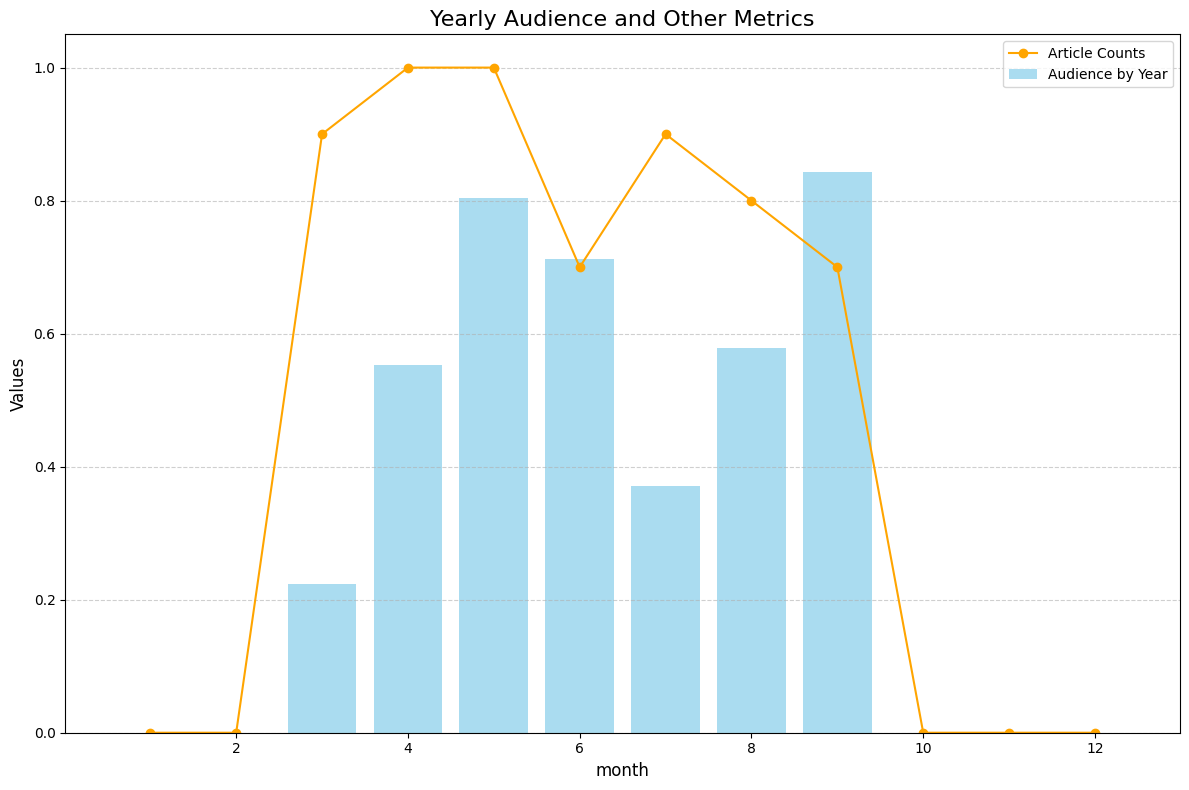

In [44]:
data = pd.read_csv('./by_teams_add_ranking.csv')

# 스케일링
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 2:])  # year 제외
scaled_df = pd.DataFrame(scaled_data, columns=data.columns[2:])  # 스케일링 결과 DataFrame
scaled_df['team'] = data['team']
scaled_df['month'] = data['month']  # 원래 연도 정보 추가

# 연도별 관중수와 다른 칼럼을 동시에 시각화
plt.figure(figsize=(12, 8))

# 관중수를 막대그래프로 시각화
plt.bar(scaled_df[scaled_df['team'] == 'LT']['month'], scaled_df[scaled_df['team'] == 'LT']['audience_counts_by_teams'], color='skyblue', alpha=0.7, label='Audience by Year')

# 다른 칼럼들의 선그래프 추가
plt.plot(scaled_df[scaled_df['team'] == 'LT']['month'], scaled_df[scaled_df['team'] == 'LT']['ranking'], color='orange', marker='o', label='Article Counts')
# plt.plot(scaled_df['year'], scaled_df['web_search_count_by_year'], color='green', marker='o', label='Web Search Count')
# plt.plot(scaled_df['year'], scaled_df['youtube_views_by_years'], color='red', marker='o', label='YouTube Views')
# plt.plot(scaled_df['year'], scaled_df['youtube_likes_by_years'], color='purple', marker='o', label='YouTube Likes')
# plt.plot(scaled_df['year'], scaled_df['youtube_comments_by_years'], color='brown', marker='o', label='YouTube Comments')

# 그래프 꾸미기
plt.title('Yearly Audience and Other Metrics', fontsize=16)
plt.xlabel('month', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# 그래프 출력
plt.show()


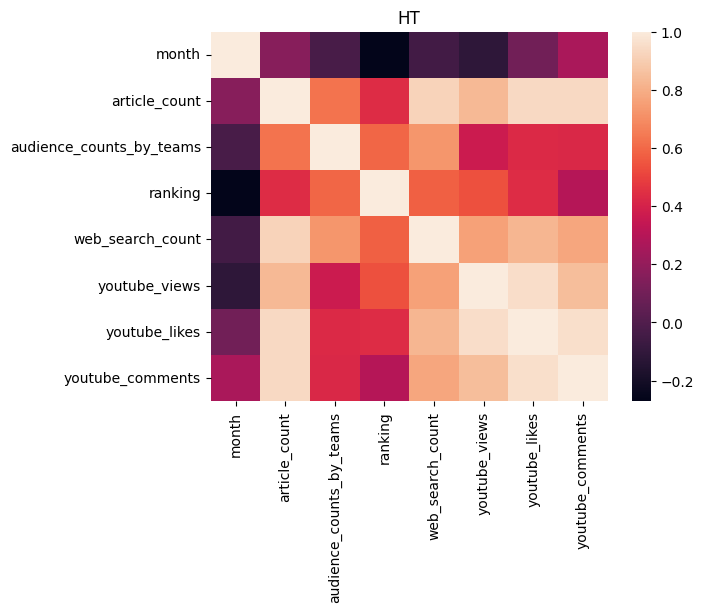

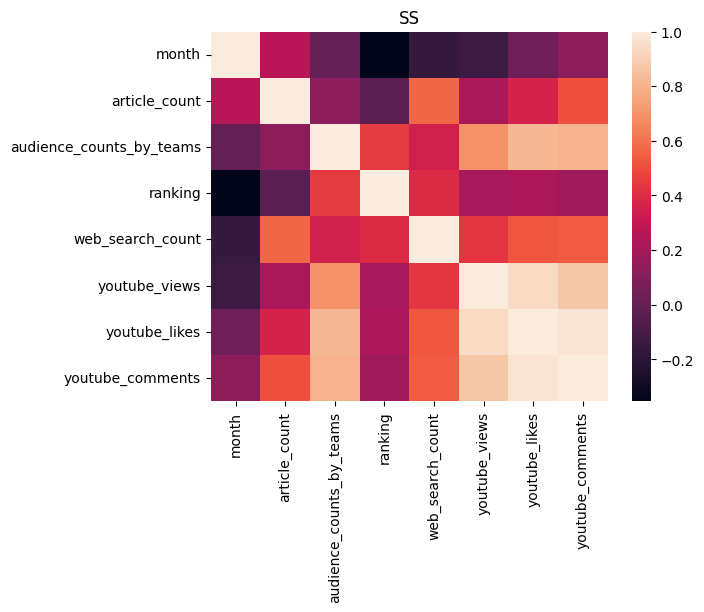

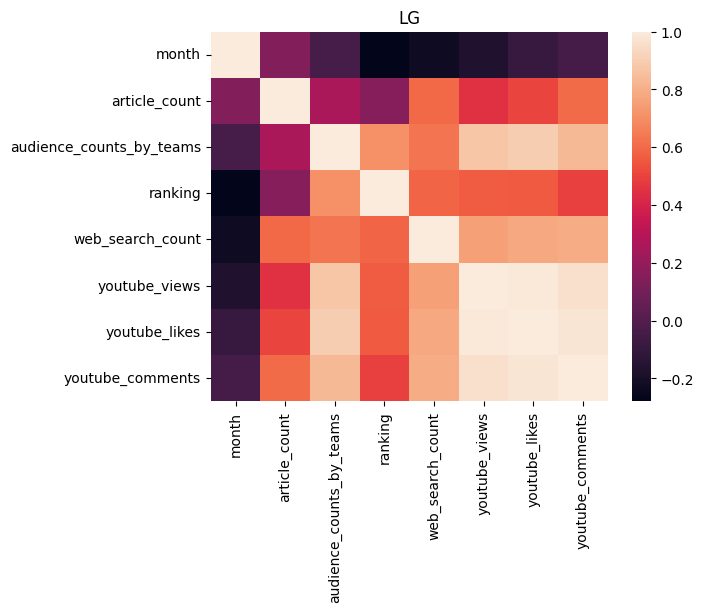

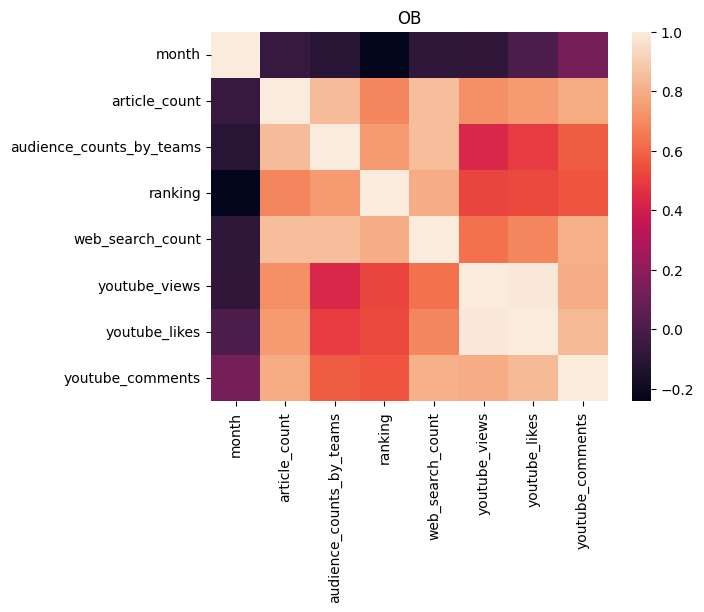

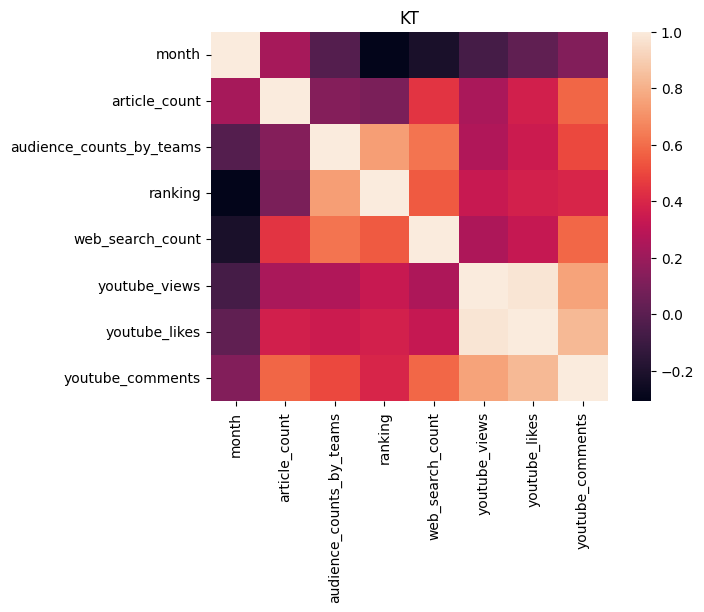

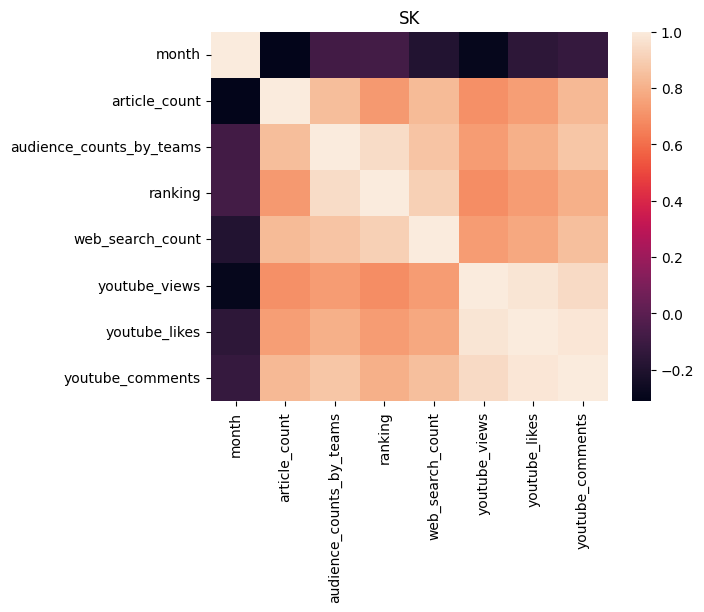

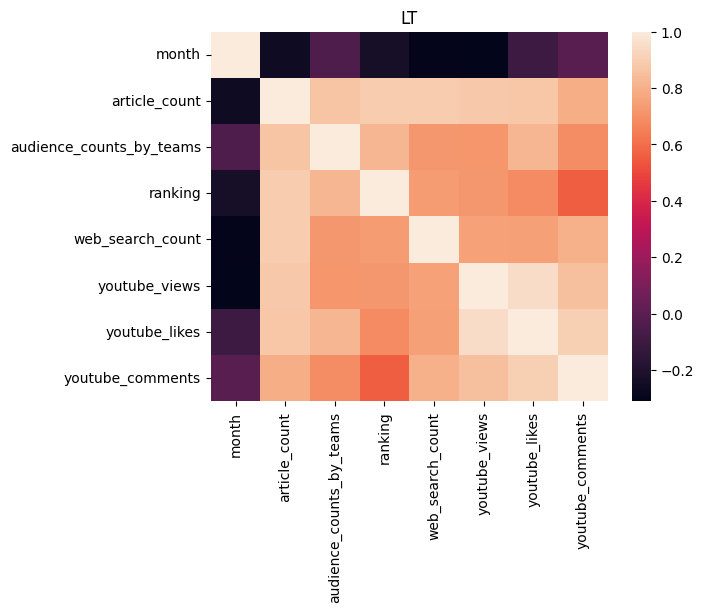

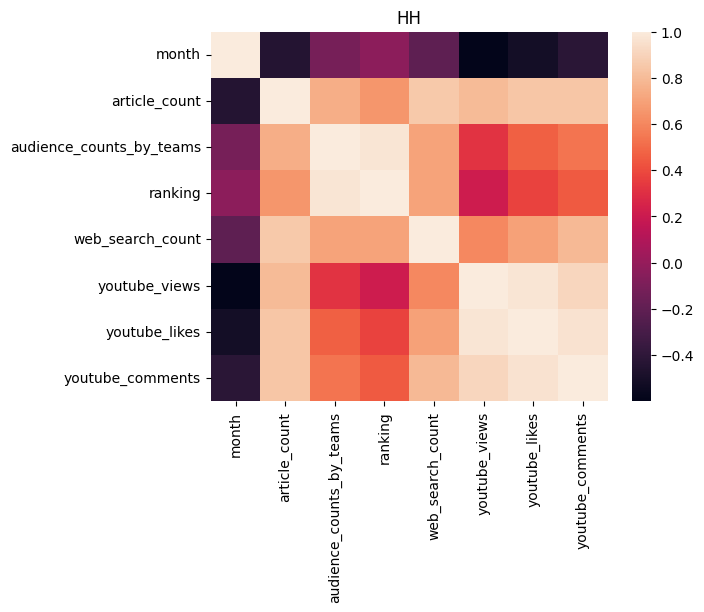

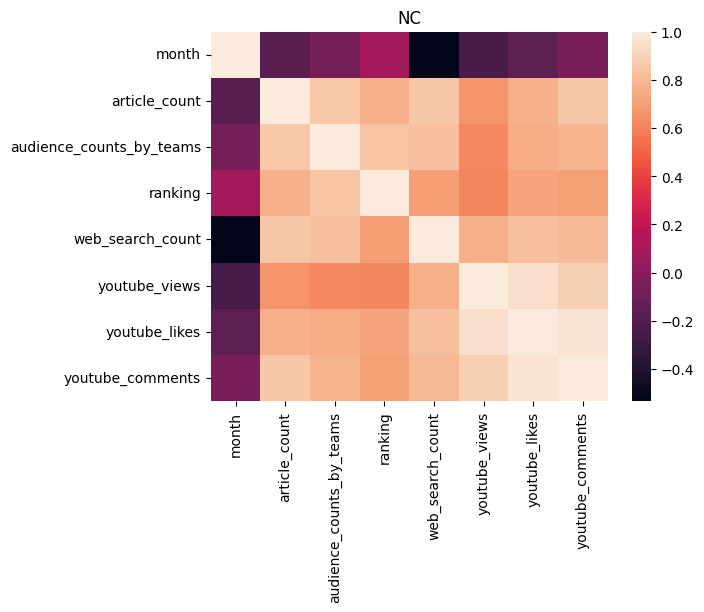

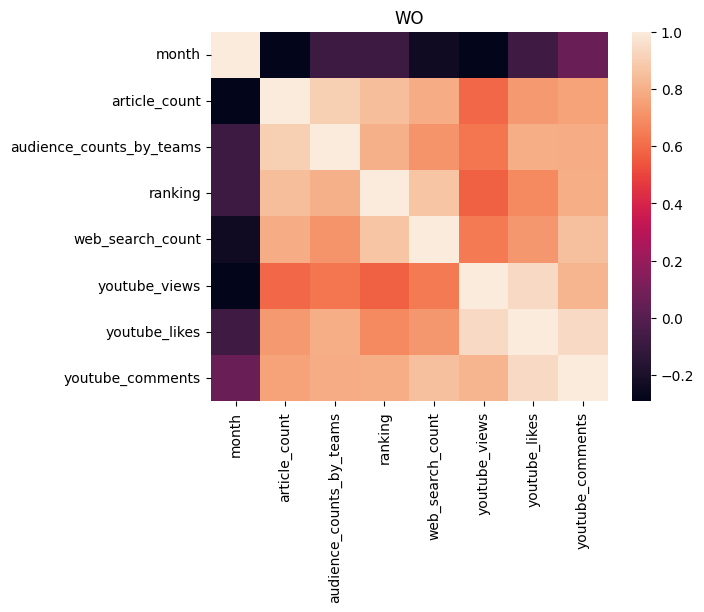

In [87]:
data = pd.read_csv('./by_teams_baseball_popluarity.csv')
teams = ["HT", "SS", "LG", "OB", "KT", "SK", "LT", "HH", "NC", "WO"]
for team in teams:
    team_temp = data[data['team']==team]
    sns.heatmap(team_temp.iloc[:, 1:].corr())
    plt.title(team)
    plt.show()

            Feature  Importance    Weight
2           ranking    0.862698  0.862698
5  youtube_comments    0.075626  0.075626
3     youtube_views    0.028494  0.028494
1     article_count    0.014167  0.014167
0  web_search_count    0.011871  0.011871
4     youtube_likes    0.007145  0.007145


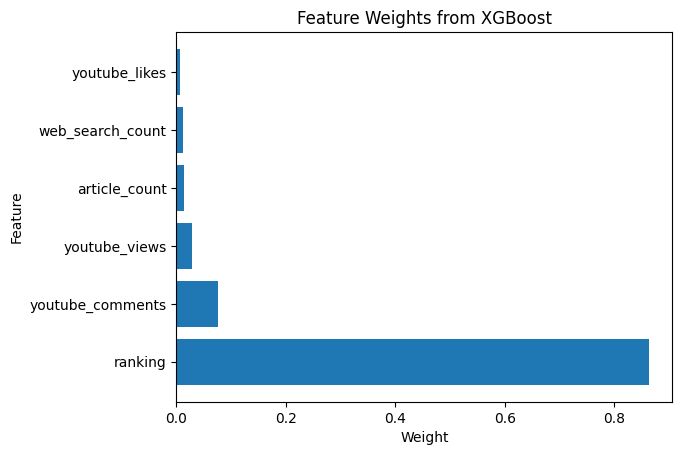

  team  total_contribution
0   HH        1.311807e+06
1   HT        7.926736e+05
2   KT        1.973280e+05
3   LG        5.184705e+05
4   LT        7.651649e+05
5   NC        2.133106e+05
6   OB        5.111054e+05
7   SK        4.426936e+05
8   SS        6.546101e+05
9   WO        2.330556e+05


'team_contributions.csv'

In [85]:

# Load data
file_path = 'by_teams_baseball_popluarity.csv'
data = pd.read_csv(file_path)

# Select target and features
X = data[['web_search_count', 'article_count', 'ranking', 'youtube_views', 'youtube_likes', 'youtube_comments']]
y = data['audience_counts_by_teams']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate feature importance
feature_importances = model.feature_importances_
feature_weights = feature_importances / np.sum(feature_importances)  # Normalize importance

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': ['web_search_count', 'article_count', 'ranking', 'youtube_views', 'youtube_likes', 'youtube_comments'],
    'Importance': feature_importances,
    'Weight': feature_weights
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print(importance_df)

# Visualize feature importances
plt.barh(importance_df['Feature'], importance_df['Weight'])
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Weights from XGBoost')
plt.show()

# Calculate team-wise contribution
data['weighted_web_search'] = data['web_search_count'] * feature_weights[0]
data['weighted_article_count'] = data['article_count'] * feature_weights[1]
data['weighted_ranking'] = data['ranking'] * feature_weights[2]
data['weighted_youtube_views'] = data['youtube_views'] * feature_weights[0]
data['weighted_youtube_likes'] = data['youtube_likes'] * feature_weights[1]
data['weighted_youtube_comments'] = data['youtube_comments'] * feature_weights[2]

data['team_contribution'] = (
    data['weighted_web_search'] +
    data['weighted_article_count'] +
    data['weighted_ranking'] +
    data['weighted_youtube_views'] +
    data['weighted_youtube_likes'] +
    data['weighted_youtube_comments']
)

# Aggregate contributions by team
team_contributions = data.groupby('team')['team_contribution'].sum().reset_index()
team_contributions = team_contributions.rename(columns={'team_contribution': 'total_contribution'})

# Display the results
print(team_contributions)

# Save the team contributions
output_path = 'team_contributions.csv'
team_contributions.to_csv(output_path, index=False)

output_path


# 2015년 이후 지표 분석을 바탕으로 올해 야구 인기도에 분석 적용

In [104]:
import pandas as pd

# 팀별 데이터 로드
data = pd.read_csv('./by_teams_baseball_popluarity.csv')
drop_data = data.drop(['month', 'ranking'], axis=1)

# 주어진 가중치 데이터
weights = {
    'web_search_count': 0.8925033,
    'article_count': 0.013924416,
    'youtube_views': 0.09357226,
    'youtube_likes': 0.0,
    'youtube_comments': 0.0
}

# 팀별 기여도 계산
for feature, weight in weights.items():
    drop_data[f'weighted_{feature}'] = drop_data[feature] * weight

# 총 기여도 합산
drop_data['team_contribution'] = sum(drop_data[f'weighted_{feature}'] for feature in weights.keys())

# 팀별 기여도 출력
team_contributions = drop_data[['team', 'team_contribution']].sort_values(by='team_contribution', ascending=False)
print(team_contributions)

# 결과 저장
output_path = '______team_contributions_2024.csv'
team_contributions.to_csv(output_path, index=False)
print(f"팀별 기여도 결과 저장: {output_path}")


    team  team_contribution
86    HH       1.828934e+06
85    HH       1.185947e+06
88    HH       9.677043e+05
87    HH       9.470587e+05
90    HH       8.974252e+05
..   ...                ...
35    LG       0.000000e+00
95    HH       0.000000e+00
23    SS       0.000000e+00
11    HT       0.000000e+00
119   WO       0.000000e+00

[120 rows x 2 columns]
팀별 기여도 결과 저장: ______team_contributions_2024.csv


            Feature    Coefficient    Weight
4     youtube_likes  131960.373535  0.486573
2           ranking   31927.012173  0.117723
0  web_search_count    7700.553830  0.028394
1     article_count    3115.168603  0.011486
5  youtube_comments  -23943.871774 -0.088287
3     youtube_views  -72556.859889 -0.267536


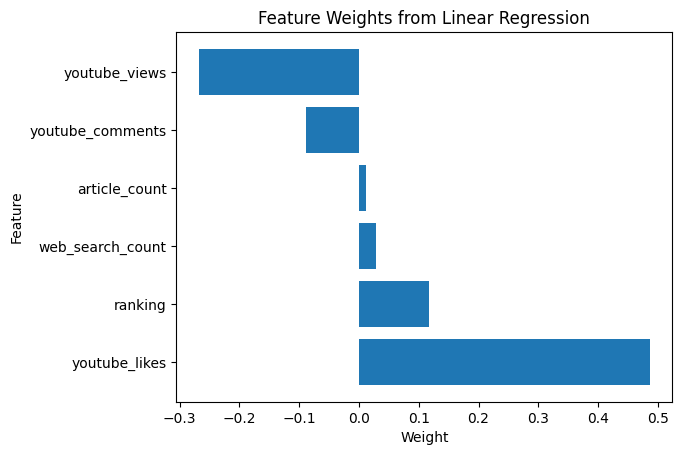

  team  total_contribution
0   HH       -2.404719e+07
1   HT       -1.445142e+07
2   KT       -3.304617e+06
3   LG       -8.690750e+06
4   LT       -1.333601e+07
5   NC       -3.432204e+06
6   OB       -8.794063e+06
7   SK       -7.578274e+06
8   SS       -1.114619e+07
9   WO       -3.717831e+06


In [90]:
# 데이터 로드
file_path = 'by_teams_baseball_popluarity.csv'
data = pd.read_csv(file_path)

# 타겟 변수와 독립 변수 설정
X = data[['web_search_count', 'article_count', 'ranking', 'youtube_views', 'youtube_likes', 'youtube_comments']]
y = data['audience_counts_by_teams']

# 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀 계수 추출
coefficients = model.coef_

# 피처별 가중치 계산
feature_weights = coefficients / np.sum(np.abs(coefficients))  # 절댓값 합 기준으로 정규화

# 결과를 데이터프레임으로 정리
importance_df = pd.DataFrame({
    'Feature': ['web_search_count', 'article_count', 'ranking', 'youtube_views', 'youtube_likes', 'youtube_comments'],
    'Coefficient': coefficients,
    'Weight': feature_weights
}).sort_values(by='Coefficient', ascending=False)

# 피처 중요도 출력
print(importance_df)

# 피처 중요도 시각화
plt.barh(importance_df['Feature'], importance_df['Weight'])
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Weights from Linear Regression')
plt.show()

# 구단별 기여도 계산
data['weighted_web_search'] = data['web_search_count'] * feature_weights[0]
data['weighted_article_count'] = data['article_count'] * feature_weights[1]
data['weighted_ranking'] = data['ranking'] * feature_weights[2]
data['weighted_youtube_views'] = data['youtube_views'] * feature_weights[3]
data['weighted_youtube_likes'] = data['youtube_likes'] * feature_weights[4]
data['weighted_youtube_comments'] = data['youtube_comments'] * feature_weights[5]

data['team_contribution'] = (
    data['weighted_web_search'] +
    data['weighted_article_count'] +
    data['weighted_ranking'] +
    data['weighted_youtube_views'] +
    data['weighted_youtube_likes'] +
    data['weighted_youtube_comments']
)

# 구단별 기여도 집계
team_contributions = data.groupby('team')['team_contribution'].sum().reset_index()
team_contributions = team_contributions.rename(columns={'team_contribution': 'total_contribution'})

# 결과 출력
print(team_contributions)

# 결과 저장
output_path = 'team_contributions_linear_updated.csv'
team_contributions.to_csv(output_path, index=False)

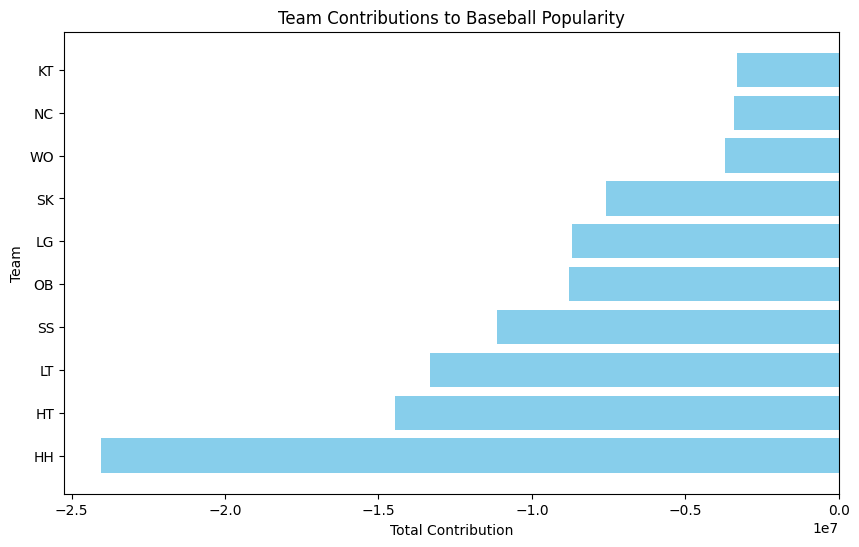

In [91]:

# 데이터 정렬
team_contributions_sorted = team_contributions.sort_values(by='total_contribution')

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(team_contributions_sorted['team'], team_contributions_sorted['total_contribution'], color='skyblue')
plt.xlabel('Total Contribution')
plt.ylabel('Team')
plt.title('Team Contributions to Baseball Popularity')
plt.show()


AHP Weights:
{'web_search': 0.544, 'article_count': 0.232, 'ranking': 0.105, 'youtube_views': 0.066, 'youtube_comments': 0.028, 'youtube_likes': 0.025}

Consistency Ratio (CR): 0.017


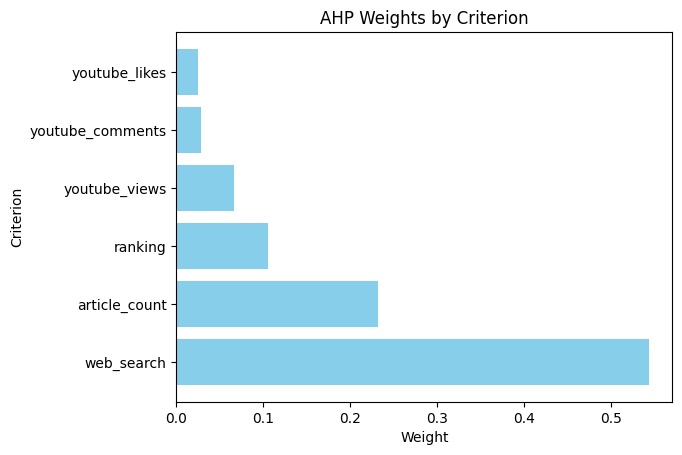

AHP Weights saved to team_contribution_ahp_weights.csv


In [97]:

# AHP pairwise 비교 행렬 정의
# 예: 기준: ['web_search', 'article_count', 'ranking', 'youtube_views', 'youtube_likes', 'youtube_comments']
criteria_comparisons = {
    ('web_search', 'article_count'): 3,  # web_search가 article_count보다 3배 더 중요
    ('web_search', 'ranking'): 5,       # web_search가 ranking보다 5배 더 중요
    ('web_search', 'youtube_views'): 7, # web_search가 youtube_views보다 7배 더 중요
    ('article_count', 'ranking'): 2,    # article_count가 ranking보다 2배 더 중요
    ('article_count', 'youtube_views'): 5,
    ('ranking', 'youtube_views'): 2,
    ('ranking', 'youtube_likes'): 3,
    ('youtube_views', 'youtube_likes'): 4,
    ('youtube_views', 'youtube_comments'): 2,
    ('youtube_likes', 'youtube_comments'): 1  # 동일 중요도
}

# AHP pairwise 비교 행렬 생성
criteria = ahpy.Compare(
    name='Criteria',
    comparisons=criteria_comparisons,
    precision=3  # 소수점 3자리까지 표시
)

# 기준별 가중치 출력
weights = criteria.target_weights
print("AHP Weights:")
print(weights)

# 결과를 데이터프레임으로 저장
weights_df = pd.DataFrame(list(weights.items()), columns=['Criterion', 'Weight']).sort_values(by='Weight', ascending=False)

# 일관성 비율(CR) 확인
print("\nConsistency Ratio (CR):", criteria.consistency_ratio)

# 시각화
import matplotlib.pyplot as plt

plt.barh(weights_df['Criterion'], weights_df['Weight'], color='skyblue')
plt.xlabel('Weight')
plt.ylabel('Criterion')
plt.title('AHP Weights by Criterion')
plt.show()

# 데이터 저장
output_path = 'team_contribution_ahp_weights.csv'
weights_df.to_csv(output_path, index=False)

print(f"AHP Weights saved to {output_path}")


In [7]:
import pandas as pd
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# 데이터 불러오기
data = pd.read_csv('./baseball_popularity_by_years.csv')

# 다중 변수 선택
variables = ['audience_by_year', 'article_counts_by_year', 'web_search_count_by_year']
data_selected = data[variables]

# 정상성 확인 및 차분 처리
def check_stationarity_and_difference(df):
    diff_df = df.copy()
    for col in df.columns:
        adf_test = adfuller(df[col])
        if adf_test[1] > 0.05:  # p-value > 0.05 (비정상성)
            print(f"{col} is not stationary, differencing applied.")
            diff_df[col] = df[col].diff().dropna()
        else:
            print(f"{col} is stationary.")
    return diff_df.dropna()

data_stationary = check_stationarity_and_difference(data_selected)

# VAR 모델 학습
model = VAR(data_stationary)
lag_order = model.select_order()  # 최적 lag order 선택
print(f"Selected lag order: {lag_order.summary()}")
fitted_model = model.fit(lag_order.aic)

# Granger 인과관계 테스트
results = fitted_model.test_causality('audience_by_year', ['article_counts_by_year', 'web_search_count_by_year'], kind='f')
print(results.summary())

# 다른 변수들 간의 인과관계도 테스트
results_2 = fitted_model.test_causality('article_counts_by_year', ['audience_by_year', 'web_search_count_by_year'], kind='f')
print(results_2.summary())


audience_by_year is not stationary, differencing applied.
article_counts_by_year is stationary.
web_search_count_by_year is not stationary, differencing applied.
Selected lag order:  VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       62.34       62.46   1.191e+27       62.30
1      61.14*      61.63*  3.868e+26*       60.96
2       61.15       62.00   5.978e+26      60.84*
-------------------------------------------------
Granger causality F-test. H_0: ['article_counts_by_year', 'web_search_count_by_year'] do not Granger-cause audience_by_year. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df  
---------------------------------------------
        0.2175          3.354   0.806 (2, 27)
---------------------------------------------
Granger causality F-test. H_0: ['audience_by_year', 'web_search_count_by_year'] do not Granger-cause a

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
